In [153]:
import pandas as pd
import sqlite3
!pip install openpyxl
!pip install matplotlib

import matplotlib.pyplot as plt




Read in first data set.

In [154]:
df1 = pd.read_csv('KYRC24_OVW_Teacher_Working_Conditions.csv')

print(df1.head())

   School Year  County Number County Name  District Number  District Name  \
0     20232024            NaN         NaN              999  All Districts   
1     20232024            NaN         NaN              999  All Districts   
2     20232024            NaN         NaN              999  All Districts   
3     20232024            1.0       ADAIR                1   Adair County   
4     20232024            1.0       ADAIR                1   Adair County   

   School Number  School Name  School Code  State School Id  NCES ID  CO-OP  \
0            NaN  All Schools       999000              NaN      NaN    909   
1            NaN  All Schools       999000              NaN      NaN    909   
2            NaN  All Schools       999000              NaN      NaN    909   
3            NaN  All Schools         1000              NaN      NaN    902   
4            NaN  All Schools         1000              NaN      NaN    902   

  CO-OP Code School Type             Impact Measure  Impact Va

In [155]:
df1.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School Year      4305 non-null   int64  
 1   County Number    4302 non-null   float64
 2   County Name      4302 non-null   object 
 3   District Number  4305 non-null   int64  
 4   District Name    4305 non-null   object 
 5   School Number    3789 non-null   float64
 6   School Name      4305 non-null   object 
 7   School Code      4305 non-null   int64  
 8   State School Id  3789 non-null   float64
 9   NCES ID          3789 non-null   float64
 10  CO-OP            4305 non-null   int64  
 11  CO-OP Code       4146 non-null   object 
 12  School Type      3789 non-null   object 
 13  Impact Measure   4305 non-null   object 
 14  Impact Value     4305 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 504.6+ KB


In [156]:
df1.describe(
)

,School Year,County Number,District Number,School Number,School Code,State School Id,NCES ID,CO-OP,Impact Value
count,4305.0,4302.000000,4305.000000,3789.000000,4305.000000,3.789000e+03,3.789000e+03,4305.000000,4305.000000
mean,20232024.0,56.334728,302.751916,112.679335,302851.089895,5.658186e+07,2.102775e+11,904.820906,67.134030
std,0.0,32.310291,189.631225,155.949339,189646.446611,3.212147e+07,1.674417e+08,2.835275,16.995624
min,20232024.0,1.000000,1.000000,2.000000,1000.000000,1.001010e+06,2.100030e+11,901.000000,0.000000
25%,20232024.0,34.000000,156.000000,21.000000,156010.000000,3.416504e+07,2.101350e+11,902.000000,56.000000
50%,20232024.0,56.000000,275.000000,60.000000,275129.000000,5.627506e+07,2.102990e+11,905.000000,69.000000
75%,20232024.0,80.000000,461.000000,130.000000,461090.000000,7.947608e+07,2.104050e+11,907.000000,80.000000
max,20232024.0,120.000000,999.000000,980.000000,999000.000000,1.206011e+08,2.106000e+11,909.000000,100.000000


Renamed this spreadsheet.

In [157]:
Working_Conditions_df = df1

In [158]:
print(Working_Conditions_df.columns)


Index(['School Year', 'County Number', 'County Name', 'District Number',
       'District Name', 'School Number', 'School Name', 'School Code',
       'State School Id', 'NCES ID', 'CO-OP', 'CO-OP Code', 'School Type',
       'Impact Measure', 'Impact Value'],
      dtype='object')


In [159]:
df_dropped_columns_Working_Conditions = Working_Conditions_df.drop(columns = ['County Number', 'County Name', 'School Number', 'School Code', 'School Type', 'CO-OP','CO-OP Code','NCES ID','State School Id', 'School Number', 'School Type'])

In [160]:
df_dropped_columns_Working_Conditions.head(20)

,School Year,District Number,District Name,School Name,Impact Measure,Impact Value
0,20232024,999,All Districts,All Schools,Managing Student Behavior,67
1,20232024,999,All Districts,All Schools,School Climate,65
2,20232024,999,All Districts,All Schools,School Leadership,69
3,20232024,1,Adair County,All Schools,Managing Student Behavior,55
4,20232024,1,Adair County,All Schools,School Climate,45
5,20232024,1,Adair County,All Schools,School Leadership,53
6,20232024,1,Adair County,Adair County High School,Managing Student Behavior,67
7,20232024,1,Adair County,Adair County High School,School Climate,45
8,20232024,1,Adair County,Adair County High School,School Leadership,55
9,20232024,1,Adair County,Adair County Middle School,Managing Student Behavior,46


Read in second data set.


In [161]:
df_Teacher_Turnover = pd.read_csv('KYRC24_OVW_Teacher_Turnover (1).csv')

print(df_Teacher_Turnover.head())

   School Year  County Number County Name  District Number  District Name  \
0     20232024            NaN         NaN              999  All Districts   
1     20232024            1.0       ADAIR                1   Adair County   
2     20232024            1.0       ADAIR                1   Adair County   
3     20232024            1.0       ADAIR                1   Adair County   
4     20232024            1.0       ADAIR                1   Adair County   

   School Number                 School Name  School Code  State School Id  \
0            NaN                 All Schools       999000              NaN   
1            NaN                 All Schools         1000              NaN   
2           10.0    Adair County High School         1010        1001010.0   
3           12.0      Adair Learning Academy         1012        1001012.0   
4           14.0  Adair County Middle School         1014        1001014.0   

        NCES ID  CO-OP CO-OP Code School Type Teacher Count  \
0    

In [162]:
df_dropped_columns_Teacher_Turnover = df_Teacher_Turnover.drop(columns = ['County Number', 'County Name', 'School Number', 'School Code', 'School Type', 'CO-OP','CO-OP Code','NCES ID','State School Id', 'School Number', 'School Type'])

In [163]:
df_dropped_columns_Teacher_Turnover.head(20)

,School Year,District Number,District Name,School Name,Teacher Count,Teacher Turnover Count,Turnover Percent
0,20232024,999,All Districts,All Schools,"49,691","11,204",22.5
1,20232024,1,Adair County,All Schools,203,39,19.2
2,20232024,1,Adair County,Adair County High School,61,11,18.0
3,20232024,1,Adair County,Adair Learning Academy,5,1,20.0
4,20232024,1,Adair County,Adair County Middle School,49,15,30.6
5,20232024,1,Adair County,Adair County Elementary School,41,4,9.8
6,20232024,1,Adair County,Adair County Primary Center,47,8,17.0
7,20232024,5,Allen County,All Schools,196,39,19.9
8,20232024,5,Allen County,Allen County Primary Center,60,12,20.0
9,20232024,5,Allen County,James E Bazzell Middle School,30,6,20.0


In [164]:
df_Teacher_Salary = pd.read_excel('Average Certified Salaries.xlsx', header=3)

print(df_Teacher_Salary.head(10))

  Dist No District name  1989-90  1990-91  1991-92  1992-93  1993-94  1994-95  \
0     001        ADAIR   26903.0  29085.0  31536.0  31640.0  31634.0  32588.0   
1     005        ALLEN   26926.0  29315.0  30809.0  31355.0  32344.0  33137.0   
2     006     ANCHORAGE  30793.0  34532.0  36566.0  38496.0  38665.0  39352.0   
3     011     ANDERSON   26356.0  29228.0  31099.0  31754.0  32557.0  33399.0   
4     012       ASHLAND  28958.0  32152.0  33479.0  33912.0  34668.0  35342.0   
5     013       AUGUSTA  25621.0  28676.0  30541.0  30870.0  30802.0  31010.0   
6     015      BALLARD   27265.0  29814.0  31234.0  30900.0  31328.0  32711.0   
7     016  BARBOURVILLE  24923.0  27858.0  29756.0  30954.0  32279.0  33411.0   
8     017     BARDSTOWN  28795.0  31723.0  33566.0  33257.0  34459.0  35920.0   
9     021       BARREN   26356.0  29631.0  31719.0  32160.0  32132.0  32999.0   

   1995-96  1996-97  ...   2016-17   2017-18   2018-19   2019-20   2020-21  \
0  32972.0  33859.0  ...  5119

In [165]:
print(df_Teacher_Salary.columns)

Index(['Dist No', 'District name', '1989-90', '1990-91', '1991-92', '1992-93',
       '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', 'Unnamed: 38'],
      dtype='object')


In [166]:
df_Teacher_Salary.head(20)

,Dist No,District name,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,...,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Unnamed: 38
0,001,ADAIR,26903.0,29085.0,31536.0,31640.0,31634.0,32588.0,32972.0,33859.0,...,51190.22,54726.26,54978.07,54481.47,54090.31,53652.29,56888.81,56572.35,57723.48,NaN
1,005,ALLEN,26926.0,29315.0,30809.0,31355.0,32344.0,33137.0,33687.0,34422.0,...,53863.30,54071.84,53996.34,54487.56,55418.62,56169.73,56781.01,58546.96,61592.45,NaN
2,006,ANCHORAGE,30793.0,34532.0,36566.0,38496.0,38665.0,39352.0,40094.0,40511.0,...,66764.40,68302.38,73263.59,74204.17,73689.69,77412.97,79360.09,81282.49,80552.72,NaN
3,011,ANDERSON,26356.0,29228.0,31099.0,31754.0,32557.0,33399.0,34195.0,34866.0,...,52038.38,52445.24,52836.96,53468.63,54475.21,54921.52,56190.34,58451.95,60949.58,NaN
4,012,ASHLAND,28958.0,32152.0,33479.0,33912.0,34668.0,35342.0,35269.0,36269.0,...,54292.70,52837.71,52725.30,53676.87,53874.7,54513.83,54677.38,56241.45,58529.93,NaN
5,013,AUGUSTA,25621.0,28676.0,30541.0,30870.0,30802.0,31010.0,32145.0,33474.0,...,50168.66,51484.81,52773.52,52671.05,52495.41,53318.76,54777.62,55779.79,58785.49,NaN
6,015,BALLARD,27265.0,29814.0,31234.0,30900.0,31328.0,32711.0,33508.0,34968.0,...,51865.25,51522.69,51893.11,52325.72,53063.22,54464.09,54885.12,57308.89,60172.28,NaN
7,016,BARBOURVILLE,24923.0,27858.0,29756.0,30954.0,32279.0,33411.0,33025.0,34842.0,...,53411.44,52525.73,52628.41,52250.31,53648.62,52704.77,55106.23,55957.51,58415.97,NaN
8,017,BARDSTOWN,28795.0,31723.0,33566.0,33257.0,34459.0,35920.0,36524.0,37240.0,...,61792.06,63006.33,63806.29,65098.10,65917.28,67339.05,69060.59,69103.89,71589.15,NaN
9,021,BARREN,26356.0,29631.0,31719.0,32160.0,32132.0,32999.0,33377.0,34279.0,...,55068.84,54770.10,55112.41,55264.61,55570.1,56665.95,58798.96,61690.39,65363.69,NaN


In [167]:
df_selected_Teacher_Salary = df_Teacher_Salary[["Dist No", "District name", "2023-24"]]
df_selected_Teacher_Salary.head(10)

,Dist No,District name,2023-24
0,001,ADAIR,56572.35
1,005,ALLEN,58546.96
2,006,ANCHORAGE,81282.49
3,011,ANDERSON,58451.95
4,012,ASHLAND,56241.45
5,013,AUGUSTA,55779.79
6,015,BALLARD,57308.89
7,016,BARBOURVILLE,55957.51
8,017,BARDSTOWN,69103.89
9,021,BARREN,61690.39


Created sql databased and put my 3 dataframes in it.


In [168]:
conn = sqlite3.connect("my_database.db")

df_selected_Teacher_Salary.to_sql("salary", conn, if_exists="replace", index=False)
df_dropped_columns_Teacher_Turnover.to_sql("turnover", conn, if_exists="replace", index=False)
df_dropped_columns_Working_Conditions.to_sql("conditions", conn, if_exists="replace", index=False)


4305

Combined salary with turnover percent.


In [169]:
query = """
SELECT 
    s.*,
    t."Turnover Percent"
FROM salary s
JOIN turnover t
    ON s."Dist No" = t."District Number"
WHERE t."School Name" = 'All Schools'
"""
result_turnover = pd.read_sql_query(query, conn)
result_turnover.head(10)

,Dist No,District name,2023-24,Turnover Percent
0,001,ADAIR,56572.35,19.2
1,005,ALLEN,58546.96,19.9
2,006,ANCHORAGE,81282.49,5.4
3,011,ANDERSON,58451.95,22.1
4,012,ASHLAND,56241.45,31.7
5,013,AUGUSTA,55779.79,20.8
6,015,BALLARD,57308.89,15.9
7,016,BARBOURVILLE,55957.51,6.4
8,017,BARDSTOWN,69103.89,21.7
9,021,BARREN,61690.39,21.1


In [170]:
result_turnover.to_csv("combined_salary_turnover.csv", index=False)

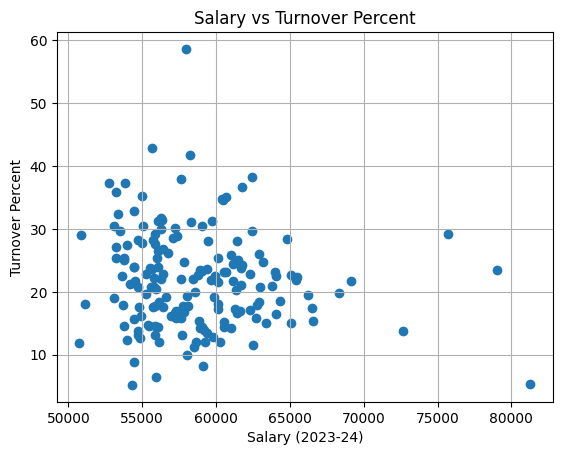

In [177]:
plt.scatter(result_turnover['2023-24'], result_turnover['Turnover Percent'])
plt.title('Salary vs Turnover Percent')
plt.xlabel('Salary (2023-24)')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined Salary with Working Conditions  - Managing Student Behavior.


In [171]:
query = """
SELECT 
    s.*,
    c."Impact Measure",
    c."Impact Value"
FROM salary s
JOIN conditions c
    ON s."Dist No" = c."District Number"
WHERE c."School Name" = 'All Schools' AND c."Impact Measure" = 'Managing Student Behavior'
"""
result_behavior = pd.read_sql_query(query, conn)
result_behavior.head(10)

,Dist No,District name,2023-24,Impact Measure,Impact Value
0,001,ADAIR,56572.35,Managing Student Behavior,55
1,005,ALLEN,58546.96,Managing Student Behavior,46
2,006,ANCHORAGE,81282.49,Managing Student Behavior,82
3,011,ANDERSON,58451.95,Managing Student Behavior,52
4,012,ASHLAND,56241.45,Managing Student Behavior,64
5,013,AUGUSTA,55779.79,Managing Student Behavior,78
6,015,BALLARD,57308.89,Managing Student Behavior,70
7,016,BARBOURVILLE,55957.51,Managing Student Behavior,75
8,017,BARDSTOWN,69103.89,Managing Student Behavior,67
9,021,BARREN,61690.39,Managing Student Behavior,68


In [172]:
result_behavior.to_csv("combined_salary_behavior.csv", index=False)

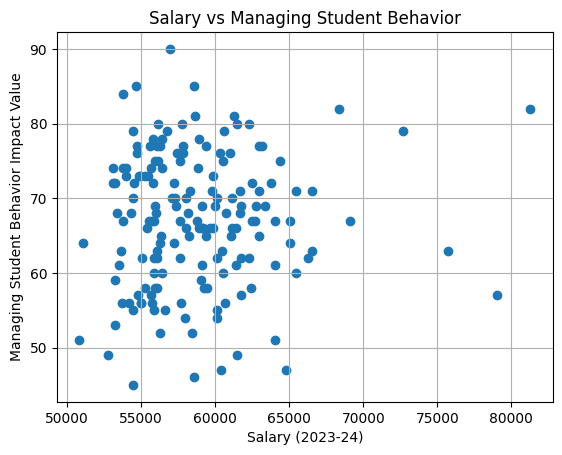

In [178]:
plt.scatter(result_behavior['2023-24'], result_behavior['Impact Value'])
plt.title('Salary vs Managing Student Behavior')
plt.xlabel('Salary (2023-24)')
plt.ylabel('Managing Student Behavior Impact Value')
plt.grid(True)
plt.show()

Combined Salary with School Leadership

In [173]:
query = """
SELECT 
    s.*,
    c."Impact Measure",
    c."Impact Value"
FROM salary s
JOIN conditions c
    ON s."Dist No" = c."District Number"
WHERE c."School Name" = 'All Schools' AND c."Impact Measure" = 'School Leadership'
"""
result_leadership = pd.read_sql_query(query, conn)
result_leadership.head(10)

,Dist No,District name,2023-24,Impact Measure,Impact Value
0,001,ADAIR,56572.35,School Leadership,53
1,005,ALLEN,58546.96,School Leadership,49
2,006,ANCHORAGE,81282.49,School Leadership,70
3,011,ANDERSON,58451.95,School Leadership,51
4,012,ASHLAND,56241.45,School Leadership,68
5,013,AUGUSTA,55779.79,School Leadership,85
6,015,BALLARD,57308.89,School Leadership,69
7,016,BARBOURVILLE,55957.51,School Leadership,76
8,017,BARDSTOWN,69103.89,School Leadership,67
9,021,BARREN,61690.39,School Leadership,75


In [174]:
result_leadership.to_csv("combined_salary_leadership.csv", index=False)

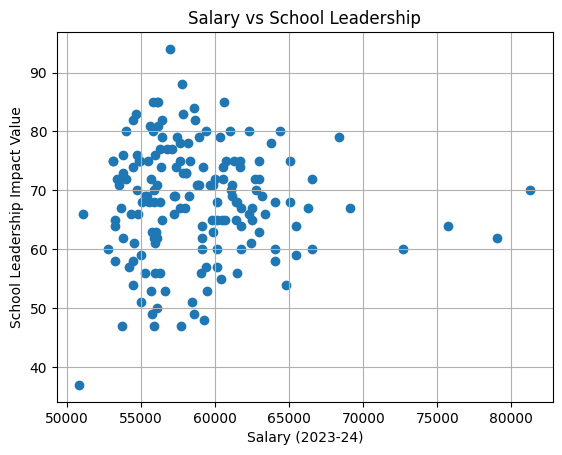

In [179]:
plt.scatter(result_leadership['2023-24'], result_leadership['Impact Value'])
plt.title('Salary vs School Leadership')
plt.xlabel('Salary (2023-24)')
plt.ylabel('School Leadership Impact Value')
plt.grid(True)
plt.show()

Combined Salary with School Climate

In [175]:
query = """
SELECT 
    s.*,
    c."Impact Measure",
    c."Impact Value"
FROM salary s
JOIN conditions c
    ON s."Dist No" = c."District Number"
WHERE c."School Name" = 'All Schools' AND c."Impact Measure" = 'School Climate'
"""
result_climate = pd.read_sql_query(query, conn)
result_climate.head(10)

,Dist No,District name,2023-24,Impact Measure,Impact Value
0,001,ADAIR,56572.35,School Climate,45
1,005,ALLEN,58546.96,School Climate,41
2,006,ANCHORAGE,81282.49,School Climate,76
3,011,ANDERSON,58451.95,School Climate,49
4,012,ASHLAND,56241.45,School Climate,66
5,013,AUGUSTA,55779.79,School Climate,80
6,015,BALLARD,57308.89,School Climate,68
7,016,BARBOURVILLE,55957.51,School Climate,81
8,017,BARDSTOWN,69103.89,School Climate,65
9,021,BARREN,61690.39,School Climate,69


In [176]:
result_climate.to_csv("combined_salary_climate.csv", index=False)

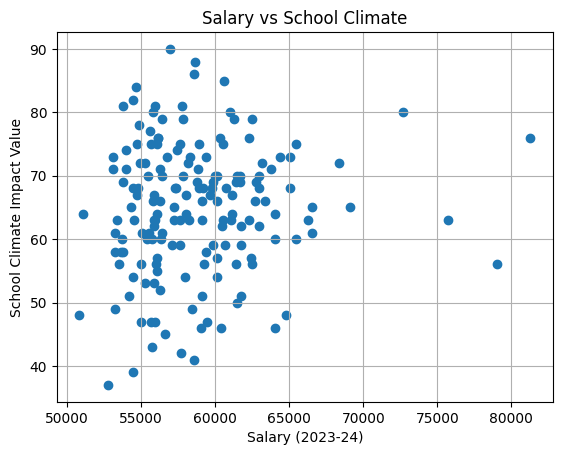

In [180]:
plt.scatter(result_climate['2023-24'], result_climate['Impact Value'])
plt.title('Salary vs School Climate')
plt.xlabel('Salary (2023-24)')
plt.ylabel('School Climate Impact Value')
plt.grid(True)
plt.show()